# Credit Risk Classifier

***

Assessing a credit risk of a possible borrower can be a complicated task especially for an inexperienced officer calculating numerous variable for future projection. However, deep neural network can learn the rather complex characteristic that separates low and high risk borrowers relatively fast with high accuracy and recall. This repository would like to elaborate such DNN, in which it can help automate the risk assassement task of a creditors.

## Data

* `german_credit_data`: This data is consisted of numerous information of prospective borrower included with their status of being a risky or safe debtors. This information includes 9 features which are 'ages,' 'sex,' 'job,' 'saving accounts,' 'checking account,' 'credit amount,' 'duration,' and 'purpose'.

## Code

### Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, ReLU, LeakyReLU, BatchNormalization

### Import Dataset

In [5]:
ds = pd.read_csv('german_credit_data.csv')

print(ds.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


The 'unnamed' and the 'Sex' column is being removed from the dataset because it is considered as inrelevant features 

In [6]:
# Drop 'Sex' features from dataset
x = ds.drop(columns=['Sex'])

# Drop the 'Unnamed' column from dataset
x = x.iloc[0:, 1:]

print(x.head())

   Age  Job Housing Saving accounts Checking account  Credit amount  Duration  \
0   67    2     own             NaN           little           1169         6   
1   22    2     own          little         moderate           5951        48   
2   49    1     own          little              NaN           2096        12   
3   45    2    free          little           little           7882        42   
4   53    2    free          little           little           4870        24   

               Purpose  Risk  
0             radio/TV  good  
1             radio/TV   bad  
2            education  good  
3  furniture/equipment  good  
4                  car   bad  


### Data Preprocessing

The data above is heavily consisted with categorical features in text format, which needs to be encoded into its numerical values. In this data preprocessing step, features in which categorical values has hierarchic relationship will be preprocessed with ordinal encoding, while the other which values are not related use one-hot-encoding. Nan values is also being replaced with the overall means of each features' values.

In [7]:
## Apply ordinal encoding on Housing columns

# Using pandas factorize method for ordinal data
categories1 = pd.Categorical(x['Housing'], categories=['free', 'rent', 'own'], ordered=True)
# Order of labels set for data
categories1
# Factorizing the column data
labels1, unique1 = pd.factorize(categories1, sort=True)
x[['Housing']] = labels1

In [8]:
print('Previous Housing column:\n',ds['Housing'].head(), '\n')
print('New Housing column:\n', x['Housing'].head())

Previous Housing column:
 0     own
1     own
2     own
3    free
4    free
Name: Housing, dtype: object 

New Housing column:
 0    2
1    2
2    2
3    0
4    0
Name: Housing, dtype: int64


In [9]:
## Apply ordinal encoding on Checking Account column

# Check on overall values and nan values
count_value2 = pd.DataFrame(x['Checking account'].value_counts())
print(count_value2)
print('Total Nan Values: ', x['Checking account'].isna().sum())

          Checking account
little                 274
moderate               269
rich                    63
Total Nan Values:  394


In [10]:
# Fill nan values with average mean
average2 = [(((count_value2.iloc[0, 0])*0.5) + ((count_value2.iloc[1, 0])*1) + ((count_value2.iloc[2, 0])*1.5)) / count_value2.iloc[:, :].sum()]
if average2[0][0] > 0.83:
    x['Checking account'] = x['Checking account'].fillna('moderate')
elif average2[0][0] > 1.16:
    x['Checking account'] = x['Checking account'].fillna('rich')
else:
    x['Checking account'] = x['Checking account'].fillna('little')

In [11]:
print('Previous Checking account column:\n',ds['Checking account'].head(), '\n')
print('New Checking account column:\n', x['Checking account'].head())

Previous Checking account column:
 0      little
1    moderate
2         NaN
3      little
4      little
Name: Checking account, dtype: object 

New Checking account column:
 0      little
1    moderate
2      little
3      little
4      little
Name: Checking account, dtype: object


In [12]:
# Using pandas factorize method for ordinal data
categories2 = pd.Categorical(x['Checking account'], categories=['little', 'moderate', 'rich'], ordered=True)
# Order of labels set for data
categories2
# Factorizing the columns set of data
labels2, unique2 = pd.factorize(categories2, sort=True)
x['Checking account'] = labels2

In [13]:
print('Previous Checking account column:\n',ds['Checking account'].head(), '\n')
print('New Checking account column:\n', x['Checking account'].head())

Previous Checking account column:
 0      little
1    moderate
2         NaN
3      little
4      little
Name: Checking account, dtype: object 

New Checking account column:
 0    0
1    1
2    0
3    0
4    0
Name: Checking account, dtype: int64


In [14]:
## Apply ordinal encoding on Saving Account column

count_value3 = pd.DataFrame(x['Saving accounts'].value_counts())
print(count_value3)
print('Total Nan Values: ',x['Saving accounts'].isna().sum())

            Saving accounts
little                  603
moderate                103
quite rich               63
rich                     48
Total Nan Values:  183


In [15]:
average3 = [(((count_value3.iloc[0, 0])*0.5) + ((count_value3.iloc[1, 0])*1) + ((count_value3.iloc[2, 0])*1.5) + ((count_value3.iloc[3, 0])*2)) / count_value3.iloc[:, :].sum()]
if average3[0][0] < 0.875:
    x['Saving accounts'] = x['Saving accounts'].fillna('moderate')
elif average3[0][0] < 1.25:
    x['Saving accounts'] = x['Saving accounts'].fillna('quite rich')
elif average3[0][0] < 1.625:
    x['Saving accounts'] = x['Saving accounts'].fillna('rich')
else:
    x['Saving accounts'] = x['Saving accounts'].fillna('little')

In [16]:
print('Previous Saving accounts column:\n',ds['Saving accounts'].head(), '\n')
print('New Saving accounts column:\n', x['Saving accounts'].head())

Previous Saving accounts column:
 0       NaN
1    little
2    little
3    little
4    little
Name: Saving accounts, dtype: object 

New Saving accounts column:
 0    moderate
1      little
2      little
3      little
4      little
Name: Saving accounts, dtype: object


In [17]:
# Using pandas factorize method for ordinal data
categories3 = pd.Categorical(x['Saving accounts'], categories=['little', 'moderate', 'quite rich', 'rich'], ordered=True)
# Order of label set for data
categories3
# Factorizing the columns set of data
labels3, unique3 = pd.factorize(categories3, sort=True)
x['Saving accounts'] = labels3

In [18]:
print('Previous Saving accounts column:\n',ds['Saving accounts'].head(), '\n')
print('New Saving accounts column:\n', x['Saving accounts'].head())

Previous Saving accounts column:
 0       NaN
1    little
2    little
3    little
4    little
Name: Saving accounts, dtype: object 

New Saving accounts column:
 0    1
1    0
2    0
3    0
4    0
Name: Saving accounts, dtype: int64


In [19]:
## Apply One Hot Encoding on Purpose columns

x = pd.concat([x, pd.get_dummies(x['Purpose'], prefix='Purpose')], axis=1)
x = x.drop(columns=['Purpose'])

In [20]:
## Convert string into number in label in risk column

categories4 = pd.Categorical(x['Risk'], categories=['bad', 'good'], ordered=True)
categories4
labels4, unique4 = pd.factorize(categories4, sort=True)
x['Risk'] = labels4

In [21]:
## Rearrange the data into cleaned_ds, x, y
y = pd.DataFrame(x['Risk'])
x = x.drop(columns='Risk')

cleaned_ds = pd.concat([x, y], axis=1)
print(cleaned_ds.head())

   Age  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    2        2                1                 0           1169   
1   22    2        2                0                 1           5951   
2   49    1        2                0                 0           2096   
3   45    2        0                0                 0           7882   
4   53    2        0                0                 0           4870   

   Duration  Purpose_business  Purpose_car  Purpose_domestic appliances  \
0         6                 0            0                            0   
1        48                 0            0                            0   
2        12                 0            0                            0   
3        42                 0            0                            0   
4        24                 0            1                            0   

   Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                  0             

The feature scaling method that is being chosen for this machine learning project is Standardization, due to its nature of being more robust against outlier contained within the data.

In [22]:
## Feature scaling the data

scale = StandardScaler()

x = pd.DataFrame(scale.fit_transform(x))

# Compute the cleaned and preprocessed data
cleaned_ds = pd.concat([x, y], axis=1)
cleaned_ds.columns = ['Age', 'Job', 'Housing', 'Saving accounts',
                      'Checking account', 'Credit amount', 'Duration',
                      'Purpose business', 'Purpose car', 'Purpose domestic appliances',
                      'Purpose education', 'Purpose furniture equipment', 'Purpose Radio/TV',
                      'Purpose repairs', 'Purpose vacations / others', 'Risk']

print(cleaned_ds.head())

        Age       Job   Housing  Saving accounts  Checking account  \
0  2.766456  0.146949  0.585603         0.546169         -0.653831   
1 -1.191404  0.146949  0.585603        -0.683941          1.001437   
2  1.183312 -1.383771  0.585603        -0.683941         -0.653831   
3  0.831502  0.146949 -2.379476        -0.683941         -0.653831   
4  1.535122  0.146949 -2.379476        -0.683941         -0.653831   

   Credit amount  Duration  Purpose business  Purpose car  \
0      -0.745131 -1.236478         -0.327749    -0.712949   
1       0.949817  2.248194         -0.327749    -0.712949   
2      -0.416562 -0.738668         -0.327749    -0.712949   
3       1.634247  1.750384         -0.327749    -0.712949   
4       0.566664  0.256953         -0.327749     1.402626   

   Purpose domestic appliances  Purpose education  \
0                    -0.110208          -0.250398   
1                    -0.110208          -0.250398   
2                    -0.110208           3.993639   


### Data Inspection

Through the following code, it can be seen that the data has the issue of siginificant inbalance between posistive (Safe) and negative (Risky) data. This problem can be easily fixed using the resampling method, which going to be displayed and explained further in this repository.

In [23]:
## Inspect the number of positive and negative label
neg_bad, pos_good = np.bincount(cleaned_ds['Risk'])
total = neg_bad + pos_good
print('Examples:\n    Total: {}\n    Positive / Good Risk: {} ({:.2f}% of total)\n    Negative / Bad Risk: {} ({:.2f}% of total)'.format(
    total, pos_good, 100 * pos_good / total, neg_bad, 100*neg_bad/total))

Examples:
    Total: 1000
    Positive / Good Risk: 700 (70.00% of total)
    Negative / Bad Risk: 300 (30.00% of total)


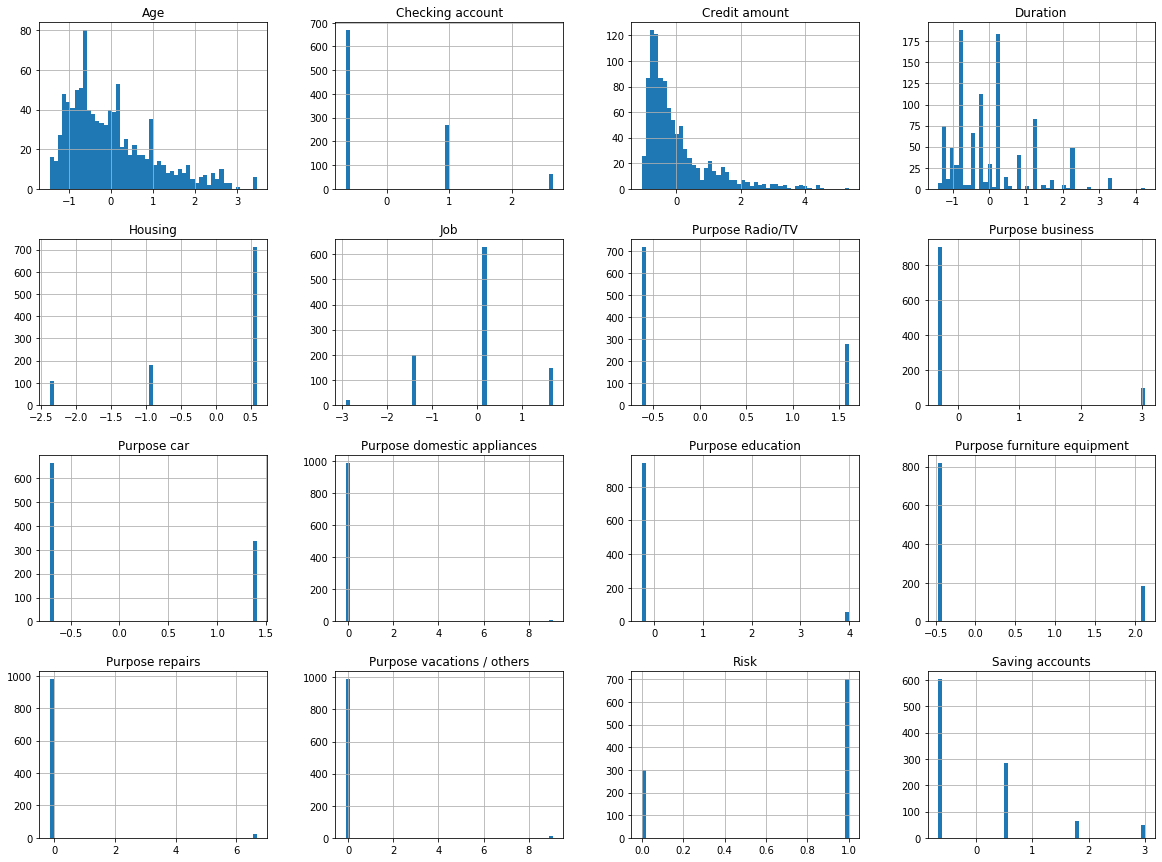

In [24]:
## Plot Data Histogram
cleaned_ds.hist(bins=50, figsize=(20, 15))
plt.show()

In [25]:
## Compute all the features correlation with risk
corr = cleaned_ds.corr()

corr['Risk'].sort_values(ascending=False)

Risk                           1.000000
Saving accounts                0.163207
Housing                        0.127789
Purpose Radio/TV               0.106922
Age                            0.091127
Purpose domestic appliances   -0.008016
Purpose repairs               -0.020828
Purpose furniture equipment   -0.020971
Purpose car                   -0.022621
Purpose vacations / others    -0.028058
Job                           -0.032735
Purpose business              -0.036129
Purpose education             -0.049085
Checking account              -0.052375
Credit amount                 -0.154739
Duration                      -0.214927
Name: Risk, dtype: float64

### Resampling The Dataset

In order to accomodate with imbalance within the data used in this algorithm, `numpy` libraries is used to resample examples and balance out the data. 

In [26]:
## Resample Positive instances
pos_ds = cleaned_ds.loc[cleaned_ds['Risk'] == 1]
neg_ds = cleaned_ds.loc[cleaned_ds['Risk'] == 0]

pos_features = pd.DataFrame(pos_ds.iloc[:, :-1]).values
pos_labels = pd.DataFrame(pos_ds.iloc[:, -1]).values

pos_ids = np.arange(len(pos_features))
pos_choice = np.random.choice(pos_ids, 2000)

pos_res_features = pd.DataFrame(pos_features[pos_choice])
pos_res_label = pd.DataFrame(pos_labels[pos_choice])

pos_res_ds = pd.concat([pos_res_features, pos_res_label], axis=1)

# Resample negative instances
neg_features = pd.DataFrame(neg_ds.iloc[:, :-1]).values
neg_labels = pd.DataFrame(neg_ds.iloc[:, -1]).values

neg_ids = np.arange(len(neg_features))
neg_choice = np.random.choice(neg_ids, 2000)

neg_res_features = pd.DataFrame(neg_features[neg_choice])
neg_res_labels = pd.DataFrame(neg_labels[neg_choice])

neg_res_ds = pd.concat([neg_res_features, neg_res_labels], axis=1)

# Compile the resampled dataset
resampled_ds = shuffle(pd.concat([neg_res_ds, pos_res_ds], axis=0))
resampled_ds.columns = cleaned_ds.columns

In [27]:
## Inpect resampled dataset

# Inspect the number of positive and negative label
neg_bad, pos_good = np.bincount(resampled_ds['Risk'])
total = neg_bad + pos_good
print('Examples:\n    Total: {}\n    Positive / Good Risk: {} ({:.2f}% of total)\n    Negative / Bad Risk: {} ({:.2f}% of total)'.format(
    total, pos_good, 100 * pos_good / total, neg_bad, 100*neg_bad/total))

Examples:
    Total: 4000
    Positive / Good Risk: 2000 (50.00% of total)
    Negative / Bad Risk: 2000 (50.00% of total)


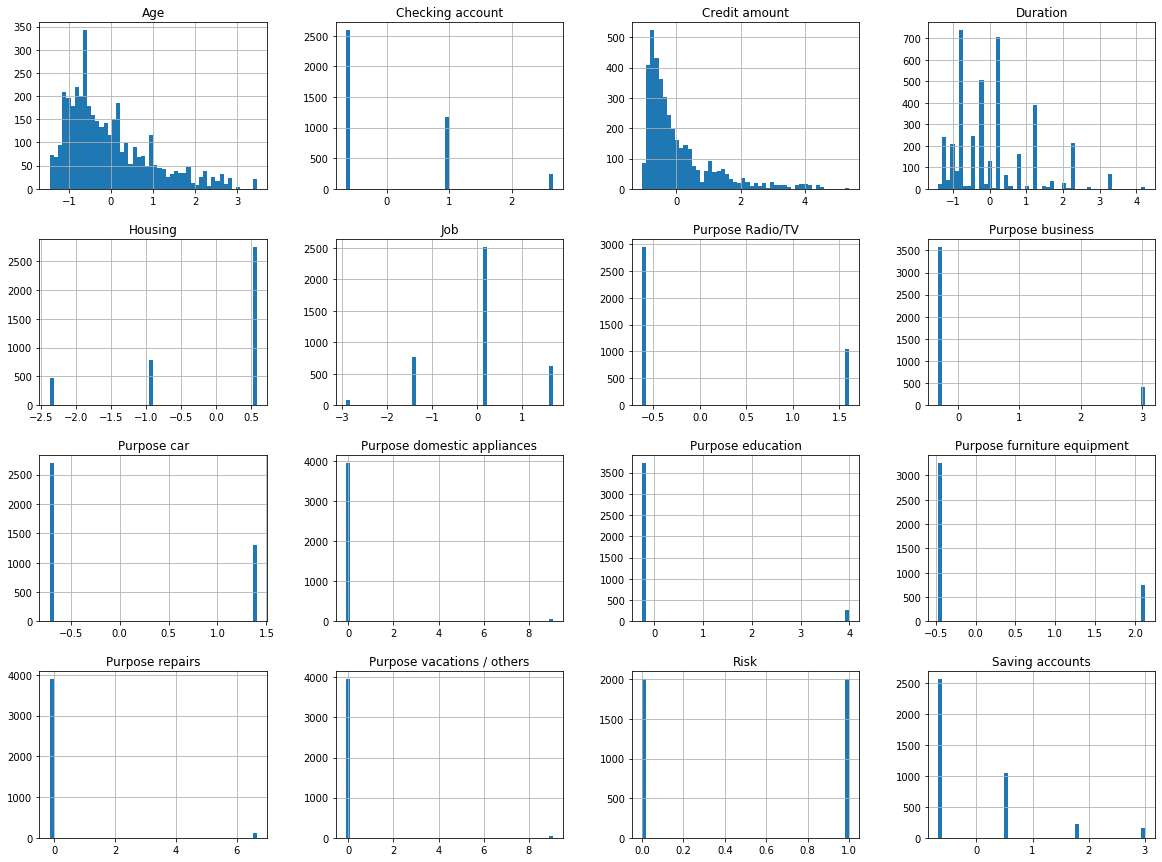

In [28]:
# Plot Resampled Data Histogram
resampled_ds.hist(bins=50, figsize=(20, 15))
plt.show()

In [29]:
# Inpect resampled dataset features correlation
resampled_ds_corr = resampled_ds.corr()

resampled_ds_corr['Risk'].sort_values(ascending=False)

Risk                           1.000000
Saving accounts                0.193341
Housing                        0.144852
Purpose Radio/TV               0.108023
Age                            0.086008
Purpose domestic appliances    0.017331
Purpose repairs                0.003031
Job                           -0.015629
Purpose vacations / others    -0.026484
Purpose furniture equipment   -0.030840
Checking account              -0.032835
Purpose car                   -0.033620
Purpose business              -0.033686
Purpose education             -0.035509
Credit amount                 -0.157059
Duration                      -0.229861
Name: Risk, dtype: float64

### Split Resampled Dataset Into Train and Test Set

In [33]:
x = np.array(resampled_ds.iloc[:, :-1])
y = np.array(resampled_ds.iloc[:, -1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Build DNN Model

In [34]:
model = Sequential([
    BatchNormalization(),
    Dense(units=50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(15,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dense(units=50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dense(units=50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dense(units=50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dense(units=50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=200, restore_best_weights=True)

### Fit The DNN Model To The Dataset

In [35]:
model.fit(x_train, y_train, validation_split=0.2, batch_size=200, epochs=3000, callbacks=[callbacks])

Train on 2560 samples, validate on 640 samples
Epoch 1/3000
2560/2560 [==============================] - 6s 2ms/sample - loss: 5.6825 - accuracy: 0.5191 - val_loss: 5.5335 - val_accuracy: 0.4656
Epoch 2/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 5.3401 - accuracy: 0.6090 - val_loss: 5.2474 - val_accuracy: 0.5047
Epoch 3/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 5.0215 - accuracy: 0.6773 - val_loss: 4.9806 - val_accuracy: 0.4797
Epoch 4/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 4.7336 - accuracy: 0.7074 - val_loss: 4.7258 - val_accuracy: 0.4781
Epoch 5/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 4.4451 - accuracy: 0.7426 - val_loss: 4.4859 - val_accuracy: 0.4797
Epoch 6/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 4.1821 - accuracy: 0.7691 - val_loss: 4.2618 - val_accuracy: 0.4750
Epoch 7/3000
2560/2560 [==============================] - 0s

2560/2560 [==============================] - 0s 39us/sample - loss: 0.7573 - accuracy: 0.9496 - val_loss: 0.9132 - val_accuracy: 0.8891
Epoch 56/3000
2560/2560 [==============================] - 0s 40us/sample - loss: 0.7381 - accuracy: 0.9559 - val_loss: 0.8493 - val_accuracy: 0.9094
Epoch 57/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.7228 - accuracy: 0.9547 - val_loss: 0.8976 - val_accuracy: 0.8734
Epoch 58/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.7341 - accuracy: 0.9512 - val_loss: 0.8736 - val_accuracy: 0.8891
Epoch 59/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.7265 - accuracy: 0.9461 - val_loss: 0.8417 - val_accuracy: 0.9047
Epoch 60/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.6968 - accuracy: 0.9531 - val_loss: 0.8253 - val_accuracy: 0.8984
Epoch 61/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.7077 - accuracy: 0.9461 - val_

2560/2560 [==============================] - 0s 47us/sample - loss: 0.3908 - accuracy: 0.9633 - val_loss: 0.4703 - val_accuracy: 0.9406
Epoch 110/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.3940 - accuracy: 0.9582 - val_loss: 0.4638 - val_accuracy: 0.9391
Epoch 111/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.3810 - accuracy: 0.9656 - val_loss: 0.4558 - val_accuracy: 0.9516
Epoch 112/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.3669 - accuracy: 0.9684 - val_loss: 0.4475 - val_accuracy: 0.9531
Epoch 113/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.3586 - accuracy: 0.9719 - val_loss: 0.4689 - val_accuracy: 0.9328
Epoch 114/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.3691 - accuracy: 0.9695 - val_loss: 0.4495 - val_accuracy: 0.9422
Epoch 115/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.3471 - accuracy: 0.9711 

2560/2560 [==============================] - 0s 39us/sample - loss: 0.2471 - accuracy: 0.9789 - val_loss: 0.3580 - val_accuracy: 0.9500
Epoch 164/3000
2560/2560 [==============================] - 0s 42us/sample - loss: 0.2556 - accuracy: 0.9699 - val_loss: 0.3615 - val_accuracy: 0.9484
Epoch 165/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.2407 - accuracy: 0.9816 - val_loss: 0.3596 - val_accuracy: 0.9500
Epoch 166/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.2436 - accuracy: 0.9793 - val_loss: 0.3730 - val_accuracy: 0.9484
Epoch 167/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.2356 - accuracy: 0.9816 - val_loss: 0.3312 - val_accuracy: 0.9500
Epoch 168/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.2547 - accuracy: 0.9707 - val_loss: 0.3509 - val_accuracy: 0.9453
Epoch 169/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.2476 - accuracy: 0.9770 

2560/2560 [==============================] - 0s 39us/sample - loss: 0.2038 - accuracy: 0.9777 - val_loss: 0.2644 - val_accuracy: 0.9688
Epoch 218/3000
2560/2560 [==============================] - 0s 36us/sample - loss: 0.2102 - accuracy: 0.9738 - val_loss: 0.2701 - val_accuracy: 0.9625
Epoch 219/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1928 - accuracy: 0.9828 - val_loss: 0.2723 - val_accuracy: 0.9594
Epoch 220/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.2015 - accuracy: 0.9781 - val_loss: 0.2773 - val_accuracy: 0.9609
Epoch 221/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.2212 - accuracy: 0.9707 - val_loss: 0.2735 - val_accuracy: 0.9625
Epoch 222/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.2150 - accuracy: 0.9727 - val_loss: 0.3026 - val_accuracy: 0.9578
Epoch 223/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1974 - accuracy: 0.9789 

2560/2560 [==============================] - 0s 37us/sample - loss: 0.1731 - accuracy: 0.9812 - val_loss: 0.2682 - val_accuracy: 0.9578
Epoch 272/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1740 - accuracy: 0.9781 - val_loss: 0.2411 - val_accuracy: 0.9672
Epoch 273/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1572 - accuracy: 0.9898 - val_loss: 0.2412 - val_accuracy: 0.9672
Epoch 274/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1904 - accuracy: 0.9738 - val_loss: 0.2559 - val_accuracy: 0.9563
Epoch 275/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1804 - accuracy: 0.9781 - val_loss: 0.2843 - val_accuracy: 0.9578
Epoch 276/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1915 - accuracy: 0.9699 - val_loss: 0.2712 - val_accuracy: 0.9516
Epoch 277/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1974 - accuracy: 0.9719 

2560/2560 [==============================] - 0s 36us/sample - loss: 0.1938 - accuracy: 0.9695 - val_loss: 0.2728 - val_accuracy: 0.9563
Epoch 326/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1713 - accuracy: 0.9754 - val_loss: 0.2701 - val_accuracy: 0.9672
Epoch 327/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1447 - accuracy: 0.9840 - val_loss: 0.2696 - val_accuracy: 0.9531
Epoch 328/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1517 - accuracy: 0.9832 - val_loss: 0.2557 - val_accuracy: 0.9641
Epoch 329/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1521 - accuracy: 0.9859 - val_loss: 0.2785 - val_accuracy: 0.9563
Epoch 330/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1492 - accuracy: 0.9812 - val_loss: 0.2437 - val_accuracy: 0.9656
Epoch 331/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1620 - accuracy: 0.9793 

2560/2560 [==============================] - 0s 39us/sample - loss: 0.1322 - accuracy: 0.9863 - val_loss: 0.2845 - val_accuracy: 0.9531
Epoch 380/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1517 - accuracy: 0.9777 - val_loss: 0.2920 - val_accuracy: 0.9547
Epoch 381/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1352 - accuracy: 0.9871 - val_loss: 0.2629 - val_accuracy: 0.9656
Epoch 382/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1254 - accuracy: 0.9879 - val_loss: 0.2315 - val_accuracy: 0.9672
Epoch 383/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1426 - accuracy: 0.9824 - val_loss: 0.2722 - val_accuracy: 0.9547
Epoch 384/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1565 - accuracy: 0.9742 - val_loss: 0.3003 - val_accuracy: 0.9563
Epoch 385/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1681 - accuracy: 0.9703 

2560/2560 [==============================] - 0s 37us/sample - loss: 0.1220 - accuracy: 0.9883 - val_loss: 0.2370 - val_accuracy: 0.9672
Epoch 434/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1213 - accuracy: 0.9863 - val_loss: 0.1917 - val_accuracy: 0.9766
Epoch 435/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1254 - accuracy: 0.9840 - val_loss: 0.2056 - val_accuracy: 0.9703
Epoch 436/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1523 - accuracy: 0.9777 - val_loss: 0.2150 - val_accuracy: 0.9734
Epoch 437/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1504 - accuracy: 0.9785 - val_loss: 0.1985 - val_accuracy: 0.9625
Epoch 438/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1438 - accuracy: 0.9758 - val_loss: 0.2221 - val_accuracy: 0.9609
Epoch 439/3000
2560/2560 [==============================] - 0s 38us/sample - loss: 0.1502 - accuracy: 0.9805 

2560/2560 [==============================] - 0s 36us/sample - loss: 0.1294 - accuracy: 0.9828 - val_loss: 0.2100 - val_accuracy: 0.9656
Epoch 488/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1125 - accuracy: 0.9887 - val_loss: 0.1961 - val_accuracy: 0.9719
Epoch 489/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1086 - accuracy: 0.9887 - val_loss: 0.2068 - val_accuracy: 0.9688
Epoch 490/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1243 - accuracy: 0.9836 - val_loss: 0.2356 - val_accuracy: 0.9594
Epoch 491/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1211 - accuracy: 0.9852 - val_loss: 0.2315 - val_accuracy: 0.9719
Epoch 492/3000
2560/2560 [==============================] - 0s 48us/sample - loss: 0.1172 - accuracy: 0.9863 - val_loss: 0.2262 - val_accuracy: 0.9641
Epoch 493/3000
2560/2560 [==============================] - 0s 47us/sample - loss: 0.1213 - accuracy: 0.9824 

2560/2560 [==============================] - 0s 39us/sample - loss: 0.1397 - accuracy: 0.9766 - val_loss: 0.2326 - val_accuracy: 0.9625
Epoch 542/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1429 - accuracy: 0.9773 - val_loss: 0.2201 - val_accuracy: 0.9672
Epoch 543/3000
2560/2560 [==============================] - 0s 36us/sample - loss: 0.1191 - accuracy: 0.9836 - val_loss: 0.1992 - val_accuracy: 0.9750
Epoch 544/3000
2560/2560 [==============================] - 0s 39us/sample - loss: 0.1221 - accuracy: 0.9820 - val_loss: 0.2046 - val_accuracy: 0.9609
Epoch 545/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1303 - accuracy: 0.9805 - val_loss: 0.2167 - val_accuracy: 0.9625
Epoch 546/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1164 - accuracy: 0.9875 - val_loss: 0.2396 - val_accuracy: 0.9563
Epoch 547/3000
2560/2560 [==============================] - 0s 37us/sample - loss: 0.1205 - accuracy: 0.9820 

### Evaluate The Model

In [40]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    recall1 = cm[0][0]/(cm[0][0]+cm[0][1])
    recall2 = cm[1][1]/(cm[1][0]+cm[1][1])
    accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

    print('Bad Risk Detected (True Negatives): ', cm[0][0])
    print('Bad Risk Incorrectly Detected (False Positives): ', cm[0][1])
    print('Good Risk Incorrectly Detected (False Negatives): ', cm[1][0])
    print('Good Risk Detected (True Positives): ', cm[1][1])
    print('Recall on Bad Risk: ', recall1)
    print('Recall on Good Risk: ', recall2)
    print('Accuracy: ', accuracy)

Bad Risk Detected (True Negatives):  398
Bad Risk Incorrectly Detected (False Positives):  5
Good Risk Incorrectly Detected (False Negatives):  17
Good Risk Detected (True Positives):  380
Recall on Bad Risk:  0.9875930521091811
Recall on Good Risk:  0.9571788413098237
Accuracy:  0.9725


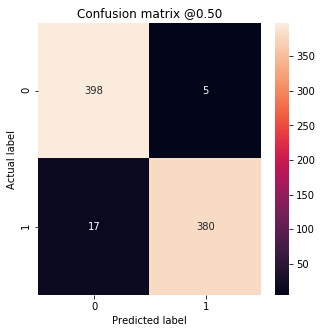

In [41]:
model_predict = model.predict(x_test)

plot_cm(y_test, model_predict)

As it can be seen from the chart above, the model makes a pretty decent prediction with strong recall in predicting bad risk, however also with great overall accuracy for both positive and negative prediction. 